##Import all necessary libraries 

In [ ]:
#importing tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
import seaborn as sns
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam


##Importing data

In [ ]:
#mouting the drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:

#Defining the path of the dataset
project_path = '/content/drive/My Drive/'
dataset_file = project_path + 'bank.csv'

In [ ]:
#reading dataset
data = pd.read_csv(dataset_file)

##Overview of Dataset

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


###Let's check the missing values 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.shape

(10000, 14)

* This shows that there are 10000 instances and 14 attributes including the exited attribute.
*  As you can see there are no null values in any of the column

In [ ]:
#Number of distinct categories or classes i.e., Fraudulent and Genuine
data['Exited'].nunique()

2

* As expected, there are only 2 classes.

In [ ]:

#checking the percentage of each class in the dataset
(data.Exited.value_counts())/(data.Exited.count())

0    0.7963
1    0.2037
Name: Exited, dtype: float64

* This shows a complete imbalance of classes. There are 79.63% not exited instances and only 20.37% bankers exited. 


In [ ]:
#Rownumber , CustomerId and Surname does not play any important role analysis the data set. 
data.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

In [ ]:
data.shape

(10000, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


##Exploring the data 

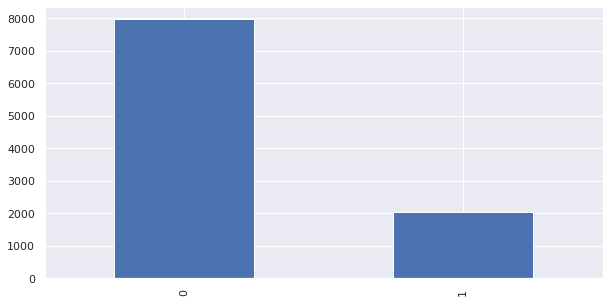

In [ ]:
#visual representation of instances per class
data.Exited.value_counts().plot.bar()

Above plot gives visual representation of the Exited column. The below plot after PCA gives a better visualization of the imbalance in the datasets. PCA helps to visualize the high dimensional data into lower dimensions 

In [ ]:
#PCS , we need to make all the columns as int so applying one hot encoding.
cat_col = ["Geography",
    "Gender"
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
----------------------------------------
Male      5457
Female    4543
Name: Gender, dtype: int64
----------------------------------------


In [ ]:
#taking the copy of data to df to use df for model building and data can be used for PCA as all the columns have to be numeric.
df = data.copy()
oneHotCols=["Geography","Gender"]
data=pd.get_dummies(data, columns=oneHotCols)
data.head(100)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,515,35,10,176273.95,1,0,1,121277.78,0,0,0,1,0,1
96,773,41,9,102827.44,1,0,1,64595.25,0,0,0,1,0,1
97,814,29,8,97086.40,2,1,1,197276.13,0,0,1,0,0,1
98,710,22,8,0.00,2,0,0,99645.04,0,0,0,1,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


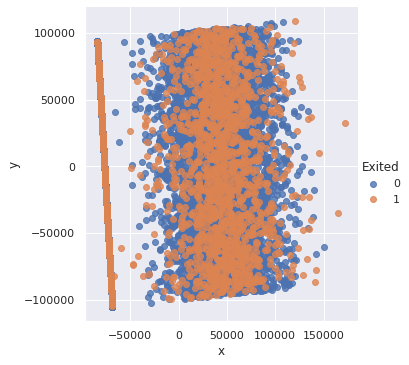

In [ ]:
#PCA is performed for visualization only

pca= PCA(n_components=2)
bank_2d= pd.DataFrame(pca.fit_transform(data.iloc[:,0:13]))
bank_2d= pd.concat([bank_2d, data['Exited']], axis=1)
bank_2d.columns= ['x', 'y', 'Exited']
sns.lmplot(x='x', y='y', data=bank_2d, fit_reg=False, hue='Exited')

* As you can see, PCA gives a better visualization of the imbalance in the datasets.

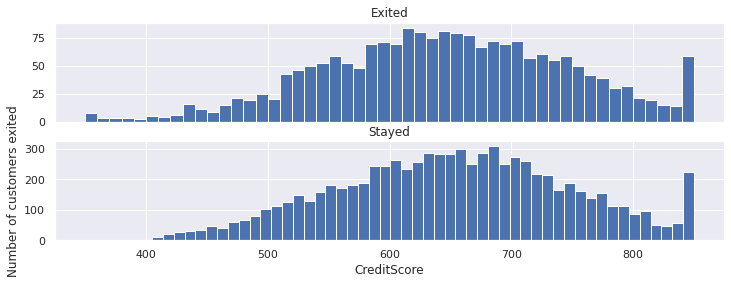

In [ ]:
#Histrogram for feature credit score
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(data["CreditScore"][data["Exited"] == 1], bins = 50)
ax1.set_title('Exited')

ax2.hist(data["CreditScore"][data["Exited"] == 0], bins = 50)
ax2.set_title('Stayed')

plt.xlabel('CreditScore')
plt.ylabel('Number of customers exited')
plt.show()

* As you can see more number customers stayed at who had credit scores between 620 and 740. Count of customers who exited are less when compared with who stayed. But it seems like normal distribution as score increased customers exited more and when the score is higher than 620-650, customers stayed and high credit score customers exited anyways. Customers with highest credit score to the end should be the ones who does not have loans and free of debt

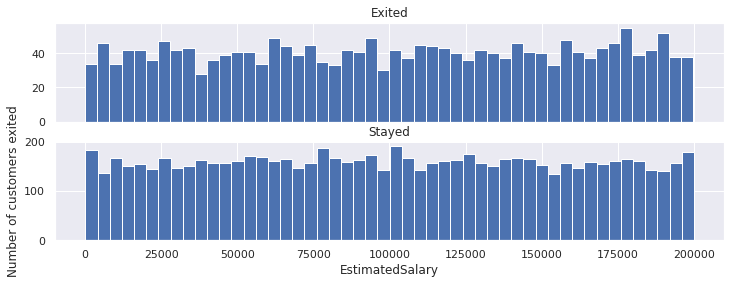

In [ ]:
#Histrogram for feature credit score
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(data["EstimatedSalary"][data["Exited"] == 1], bins = 50)
ax1.set_title('Exited')

ax2.hist(data["EstimatedSalary"][data["Exited"] == 0], bins = 50)
ax2.set_title('Stayed')

plt.xlabel('EstimatedSalary')
plt.ylabel('Number of customers exited')
plt.show()

* Using estimated salary, it is really hard to find out people exited or stayed. At different salaries we can see people exited or stayed.

In [ ]:
def perc_on_bar(feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    # Creating a countplot for the feature
    sns.set(rc={"figure.figsize": (10, 5)})
    ax = sns.countplot(x=feature, data=df)

    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=14)  # annotate the percantage

    plt.show()  # show the plot

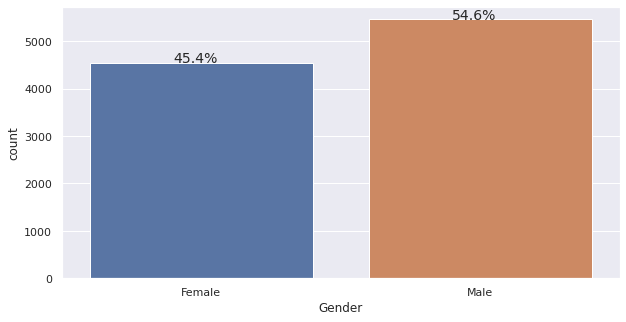

In [ ]:
perc_on_bar(df["Gender"])

* As you can see, more Male customers than female.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

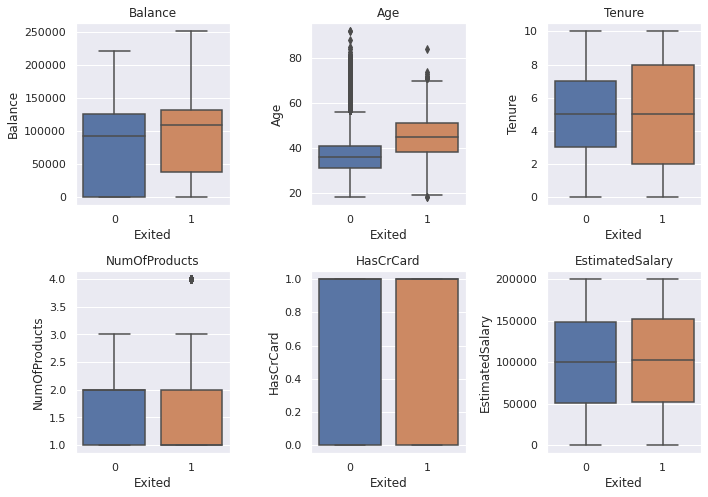

In [ ]:
cols = df[["Balance", "Age", "Tenure", "NumOfProducts","HasCrCard","EstimatedSalary"]].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(df["Exited"], df[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

* Key observations:
Customers with high balance exited than who stayed. 
Customers with higher age exited. This means bank need to concentrate more the customers between 30 to 42 of age. 
Customers whose tenure is longer exited than customers who have less tenure. This mean long term customers may found of more benefits with other banks . 
Customers with higher salary have exited as bank may be giving the less savings or other benefits.

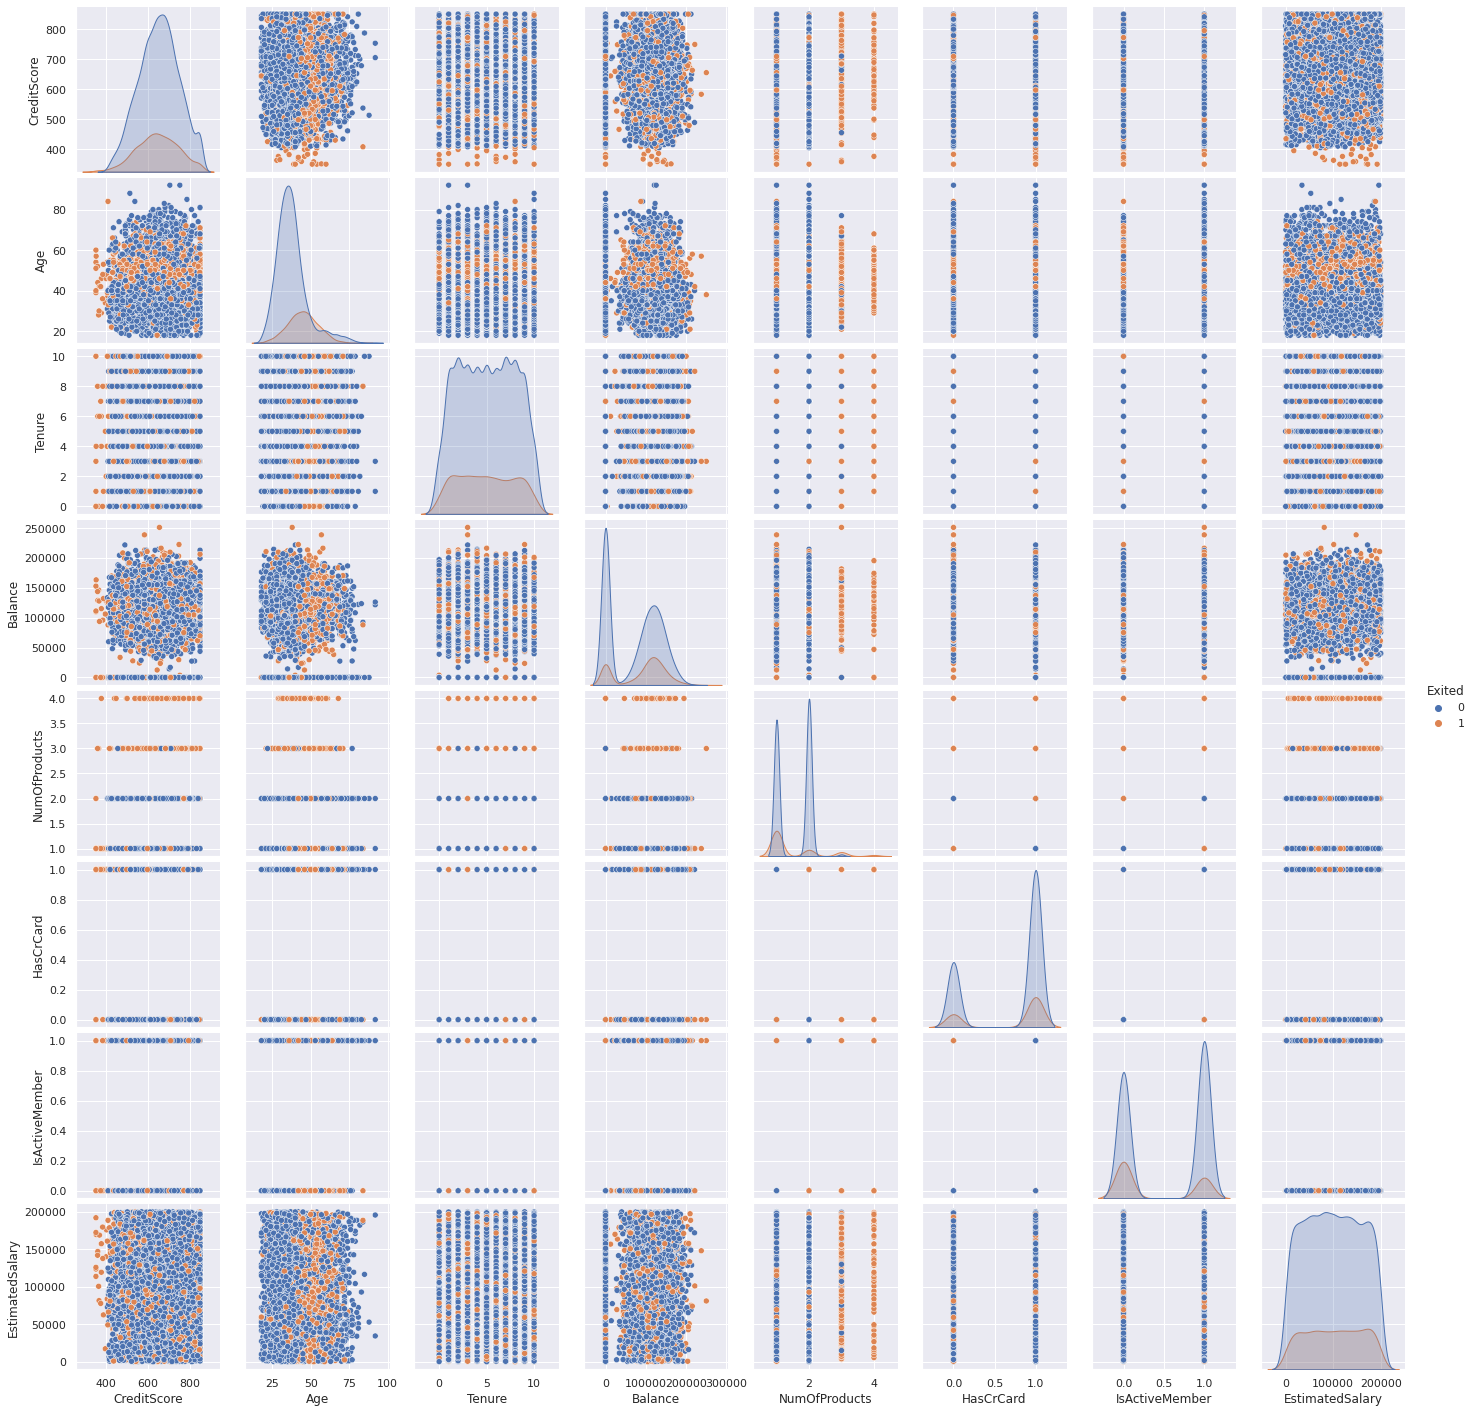

In [ ]:

sns.pairplot(df, hue="Exited")

* Key observations:
Customers with more number of products with credit card usage have exited. 
Overall pair plot have more customers who stayed which is blue dot and less exited. 
Customers with age between 40 and 60 have exited more.

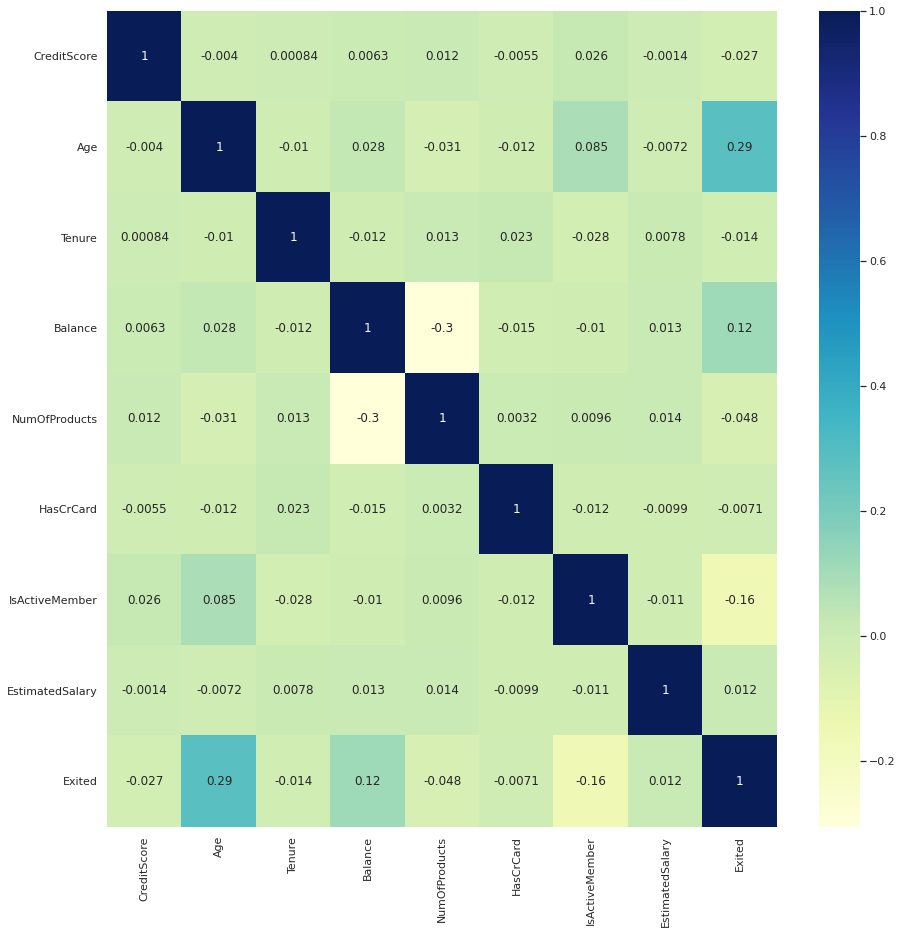

In [ ]:
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


###Separating response variable and predictors 

In [ ]:
df.shape
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
y_data=data.pop('Exited')
X_data = data

In [ ]:
#printing the shape of the data 
print(y_data.shape)
print(X_data.shape)


(10000,)
(10000, 13)


In [ ]:
X_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [ ]:
y_data

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

###Data Pre-processing

In [ ]:
#Standardizing the Amount column (All other 'V' columns are already scaled as they've undergone PCA transformation).
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#X_data['normalizedAmount'] = StandardScaler().fit_transform(X_data['Amount'].values.reshape(-1,1))  # Normalize 'Amount' in [-1,+1] range
#X_data= X_data.drop(['Amount'],axis=1)

scaler = MinMaxScaler() 

features = ["CreditScore", "Age", "Balance",'EstimatedSalary']

X_data = pd.DataFrame(data = X_data)
X_data[features] = scaler.fit_transform(X_data[features])

###Splitting the Data into train and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

In [ ]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 13)
(2000, 13)
(8000,)
(2000,)


##Model Building

### sequential class model




In [ ]:
#initialize the model
model = Sequential()

### Adding layers [layers and activations]

Using sigmoid at the output layer as we have one target variable Exited

In [ ]:

# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(units=16, input_dim = 13,activation='relu'))   # input of 13 columns as shown above
# hidden layer
model.add(Dense(units=24,activation='relu'))
#Adding Dropout to prevent overfitting 
model.add(Dropout(0.5))
model.add(Dense(24,activation='relu'))
model.add(Dense(24,activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (fraud or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1,activation='sigmoid'))                        # binary classification fraudulent or not

### Model compile [optimizers and loss functions]




In [ ]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

###summary of the model 

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_9 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_3 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_11 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 25        
Total params: 1,857
Trainable params: 1,857
Non-trainable params: 0
____________________________________________________

## Training [Forward pass and Backpropagation]

Training the model

In [ ]:

#fitting the model
history=model.fit(X_train,y_train,batch_size=15,epochs=10,validation_split=0.2)

Epoch 1/10
427/427 [==============================] - 2s 4ms/step - loss: 0.5286 - accuracy: 0.7968 - val_loss: 0.4910 - val_accuracy: 0.7894
Epoch 2/10
427/427 [==============================] - 1s 3ms/step - loss: 0.4855 - accuracy: 0.7979 - val_loss: 0.4844 - val_accuracy: 0.7894
Epoch 3/10
427/427 [==============================] - 1s 3ms/step - loss: 0.4773 - accuracy: 0.7909 - val_loss: 0.4630 - val_accuracy: 0.7900
Epoch 4/10
427/427 [==============================] - 1s 3ms/step - loss: 0.4703 - accuracy: 0.7911 - val_loss: 0.4533 - val_accuracy: 0.7925
Epoch 5/10
427/427 [==============================] - 1s 3ms/step - loss: 0.4256 - accuracy: 0.8154 - val_loss: 0.4387 - val_accuracy: 0.8131
Epoch 6/10
427/427 [==============================] - 1s 3ms/step - loss: 0.4231 - accuracy: 0.8076 - val_loss: 0.4252 - val_accuracy: 0.8094
Epoch 7/10
427/427 [==============================] - 1s 3ms/step - loss: 0.4212 - accuracy: 0.8143 - val_loss: 0.4143 - val_accuracy: 0.8138
Epoch 

Plotting the train and test loss

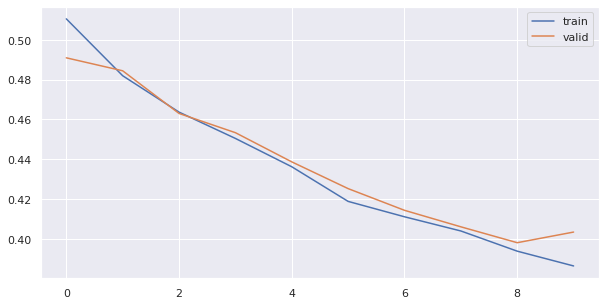

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


As you can see, validation data set is overfitting over the training data set

### Evaluation



In [ ]:
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8250


In [ ]:
print(score)


[0.39798709750175476, 0.824999988079071]


Accuraacy is at 82 percent , not bad but we will see with less hidden layers.
Loss is 40 percent. 
Lets draw confusion matrix further to see the precision and recall. 

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

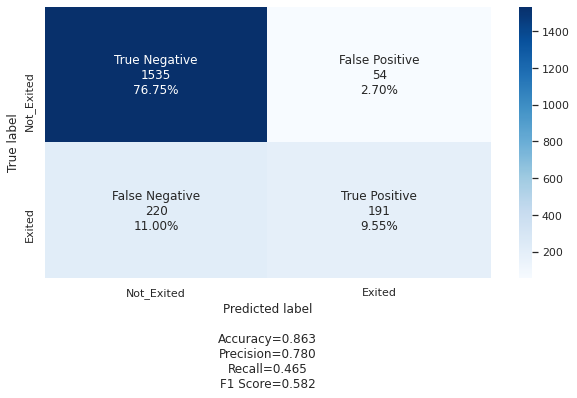

In [ ]:
#Checking what scores does RandomForest gives.
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train.values.ravel())
y_pred = random_forest.predict(X_test)

random_forest.score(X_test,y_test)

cm1=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

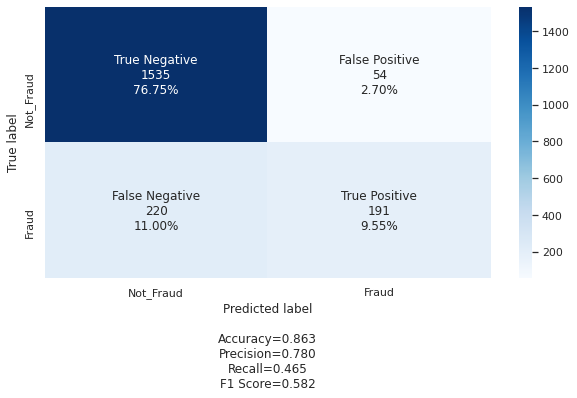

In [ ]:
#Model 1 with more hidden layers confusion matrix. 
import seaborn as sn
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0

cm1=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

#Model-2

In [ ]:
#Training Multi-layer perceptron with 2 hidden layers

#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                             verbose=0, mode='min', restore_best_weights= True)
Model2 = Sequential()
#Initializing the weights uisng hue_normal 
Model2.add(Dense(65, input_shape=(13, ), kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model2.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod2= Model2.fit(X_train, y_train, validation_split=0.2, batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=1)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/40
10/10 [==============================] - 1s 31ms/step - loss: 1.4429 - accuracy: 0.5590 - val_loss: 0.9164 - val_accuracy: 0.7831
Epoch 2/40
10/10 [==============================] - 0s 5ms/step - loss: 1.1530 - accuracy: 0.6919 - val_loss: 0.8642 - val_accuracy: 0.7887
Epoch 3/40
10/10 [==============================] - 0s 5ms/step - loss: 1.0111 - accuracy: 0.7016 - val_loss: 0.6902 - val_accuracy: 0.7887
Epoch 4/40
10/10 [==============================] - 0s 5ms/step - loss: 0.9404 - accuracy: 0.6832 - val_loss: 0.6021 - val_accuracy: 0.7894
Epoch 5/40
10/10 [==============================] - 0s 4ms/step - loss: 0.8424 - accuracy: 0.6891 - val_loss: 0.5623 - val_accuracy: 0.7894
Epoch 6/40
10/10 [==============================] - 0s 4ms/step - loss: 0.7446 - accuracy: 0.7037 - val_loss: 0.5467 - val_accuracy: 0.7894
Epoch 7/40
10/10 [==============================] - 0s 5ms/step - loss: 0.7076 - accuracy: 0.7275 - val_loss: 0.5273 - val_accuracy: 0.7894
Epoch 8/40
10/10 [=

Plotting the train and validation loss

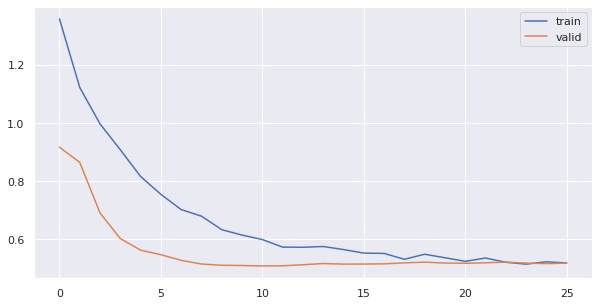

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod2.history)
hist['epoch'] = his_mod2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


Learning history per epoch initially  both train and validation have come down and getting on same lines. At epoch number 10 , the accuracy is better and loss is less for validation.

In [ ]:
score = Model2.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.7945


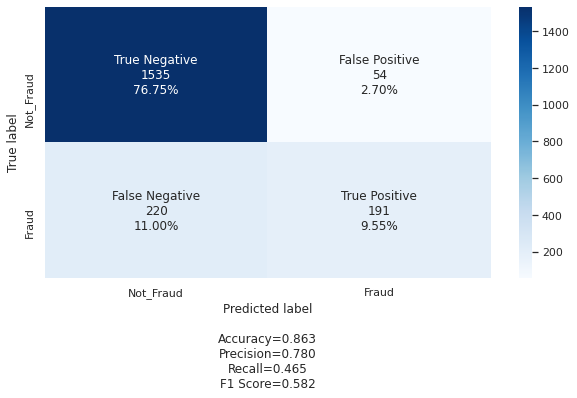

In [ ]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = Model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0

cm1=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

With Model 2 less number of hidden layers, I can still see that Recall is not improved at all. Lets try with using weights. 

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), np.array([y_train.iloc[i] for i in range(len(y_train))]))
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.627549419516787, 1: 2.4600246002460024}

Training the model

In [ ]:
model.fit(X_train,y_train,batch_size=15,epochs=5, class_weight=class_weights, shuffle=True)

Epoch 1/5
534/534 [==============================] - 2s 3ms/step - loss: 0.5373 - accuracy: 0.7241
Epoch 2/5
534/534 [==============================] - 2s 3ms/step - loss: 0.5208 - accuracy: 0.7319
Epoch 3/5
534/534 [==============================] - 2s 3ms/step - loss: 0.5174 - accuracy: 0.7396
Epoch 4/5
534/534 [==============================] - 2s 3ms/step - loss: 0.5062 - accuracy: 0.7585
Epoch 5/5
534/534 [==============================] - 2s 3ms/step - loss: 0.5106 - accuracy: 0.7577


At epoch 4, loass is less and accuracy is better in training

In [ ]:
score_weighted = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.7780


Plotting confusion matrix 

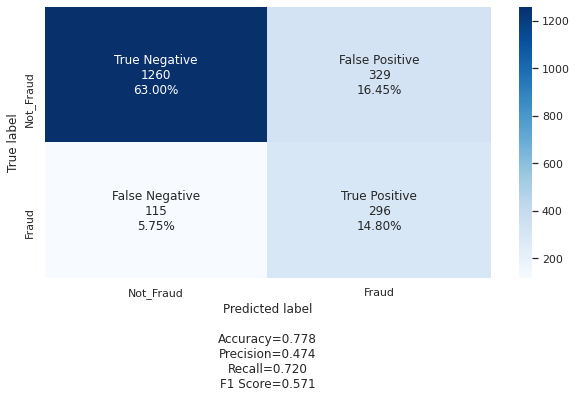

In [ ]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

With weights, I see the Recall has improved a lot, but the precision have gone down.  As I have chose Recall score metric to be improved and it did at this model . 

 
 **Model Performance Evaluation and Conclusion:** 



 Recall is increased but the precision is very bad.  There is still  lot of scope of  improvements  as follows:

1) To get the optimal value tuning the threshold can help. 

2) Over smapling technique can be applied to get the better performance 

3) Tuning with Hyperparameters, model performance can be improved.

My comments above have used all the performance metrics to evaluate the model. 

We can select the Model-1 or model 2 based on the above analysis . Results are same for both of these models. 